# CS156, Spring 2022
# Homework 5

### Roster Name: Hoang Truong
### Preferred Name: Luan
### Student ID: 015656082
### Email: truongluan303@gmail.com

In [2]:
libs = ['numpy', 'pandas', 'matplotlib', 'sklearn']
try:
    for lib in libs:
        __import__(lib)
except ImportError:
    from subprocess import check_call
    from sys import executable
    check_call([executable, '-m', 'pip', 'install'] + libs)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

np.random.seed(42)

In [7]:
DATA_FILE = 'homework5_input_data.csv'

df = pd.read_csv(DATA_FILE)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103590,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103591,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103592,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]
X.shape, Y.shape

((103594, 22), (103594,))

In [9]:
X_num = pd.get_dummies(X, columns=X.columns, prefix=X.columns)
X_num

,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13,Age_14,...,Arrival Delay in Minutes_860.0,Arrival Delay in Minutes_920.0,Arrival Delay in Minutes_924.0,Arrival Delay in Minutes_952.0,Arrival Delay in Minutes_970.0,Arrival Delay in Minutes_1011.0,Arrival Delay in Minutes_1280.0,Arrival Delay in Minutes_1584.0,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
103590,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
103591,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
103592,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
TEST_SIZE = 0.2
RAND_STATE = 0

X_train, X_test, Y_train, Y_test = train_test_split(X_num, Y, test_size=TEST_SIZE, random_state=RAND_STATE)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(20719,)

In [14]:
print('This may take a while...')

model = DecisionTreeClassifier(random_state=0)
score = cross_val_score(model, X_train, Y_train, cv=5)
model.fit(X_train, Y_train)

print(f'Cross-Validation Accuracy: {score}')
print(f'Mean Accuracy: {score.mean()}')
print(f'Trained Accuracy: {model.score(X_train, Y_train):.2f}')
print(f'Test Accuracy: {model.score(X_test, Y_test):.2f}')

Cross-Validation Accuracy: [0.59420814 0.59300151 0.58769231 0.59342383 0.59088989]
Mean Accuracy: 0.5918431372549019
Trained Accuracy: 1.00


/Users/luantruong/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/luantruong/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


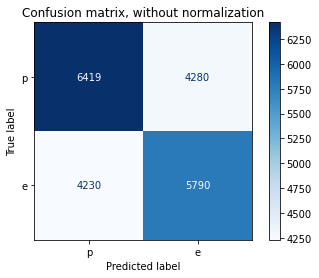

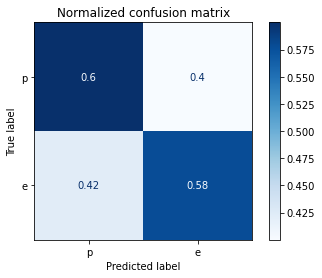

In [18]:
np.set_printoptions(precision=2)
title_op = [("Confusion matrix, without normalization", None), 
            ("Normalized confusion matrix", 'true')]

for title, normalize in title_op:
    display = plot_confusion_matrix(model, X_test, Y_test,
                                    display_labels=['p', 'e'],
                                    cmap=plt.cm.Blues, 
                                    normalize=normalize)
    display.ax_.set_title(title)

plt.show()